***Installing Required Libraries***

In [7]:
!pip install --quiet rembg onnxruntime opencv-python-headless pillow numpy

***Downloading the Dataset***

In [2]:
import kagglehub
path = kagglehub.dataset_download("awsaf49/coco-2017-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coco-2017-dataset' dataset.
Path to dataset files: /kaggle/input/coco-2017-dataset


***Importing Libraries***

In [3]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

***Selecting Sample Images***

In [4]:
Val2017 = Path("/kaggle/input/coco-2017-dataset/coco2017/val2017")
Img_path = ["000000000285.jpg","000000000785.jpg","000000001584.jpg","000000004134.jpg",
                   "000000005037.jpg","000000000872.jpg","000000001532.jpg","000000013597.jpg"
  ]

Selected_imgs = []
for fn in Img_path:
   p = Val2017 / fn
   Selected_imgs.append(p)

***Masking Images***

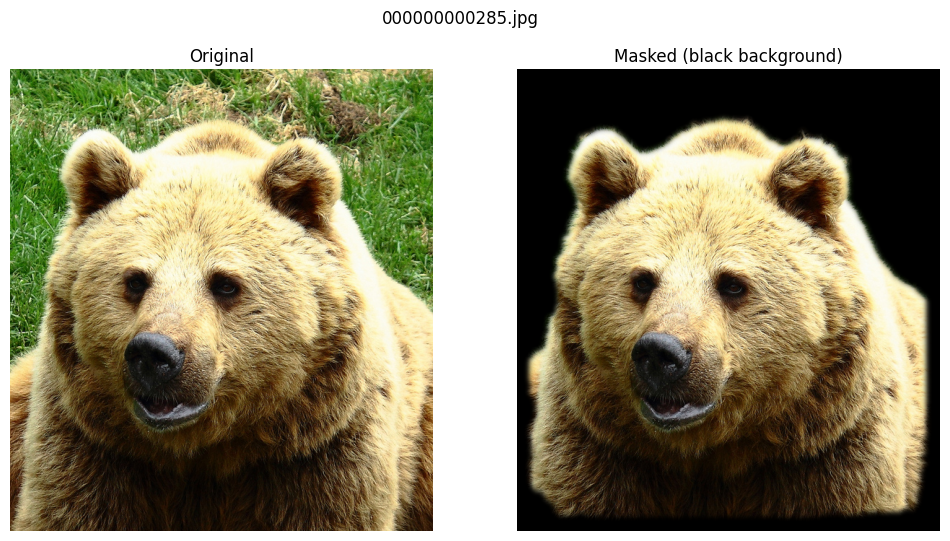

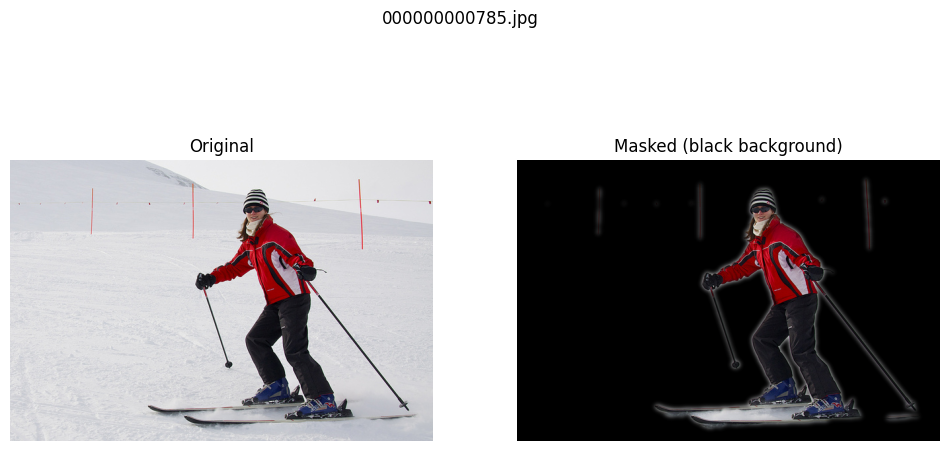

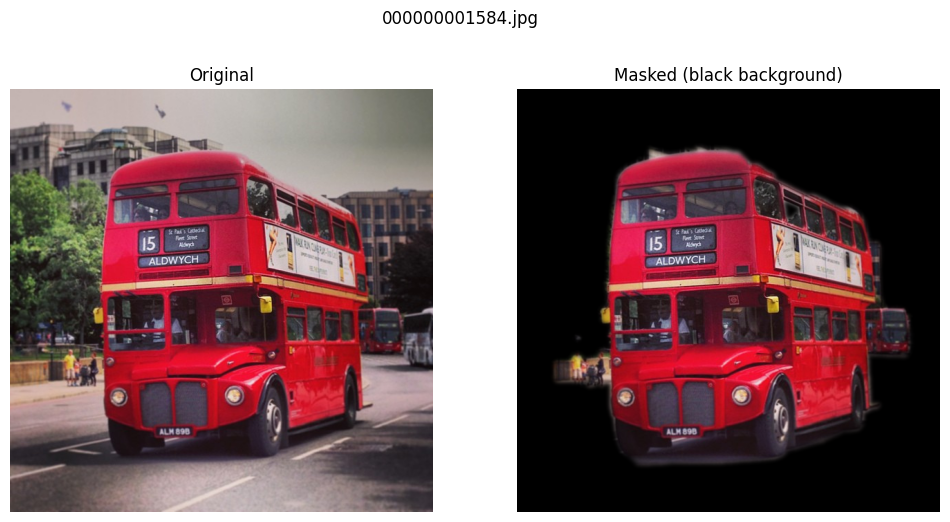

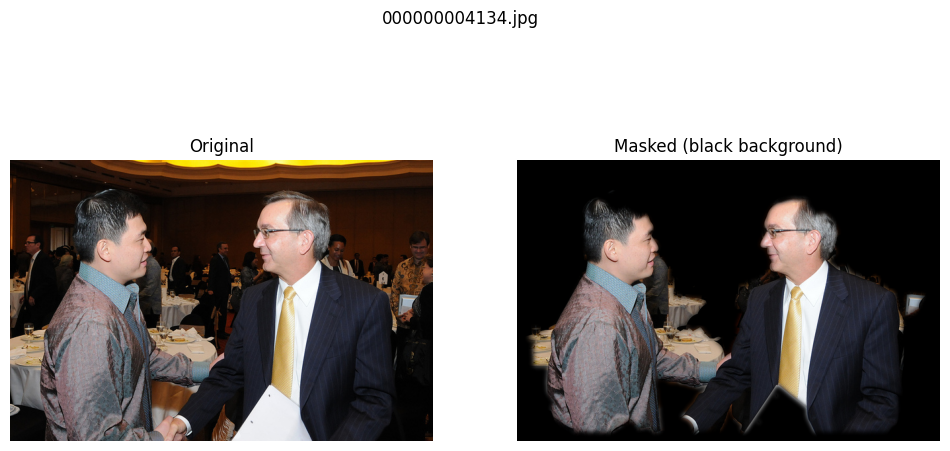

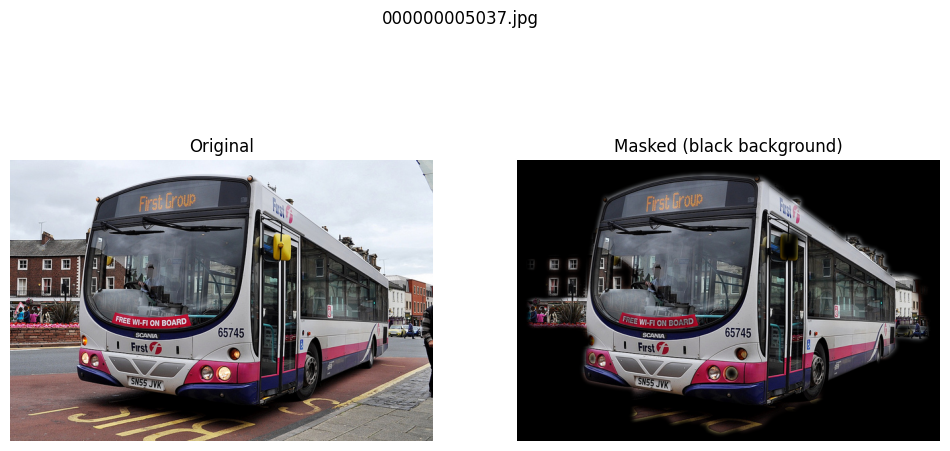

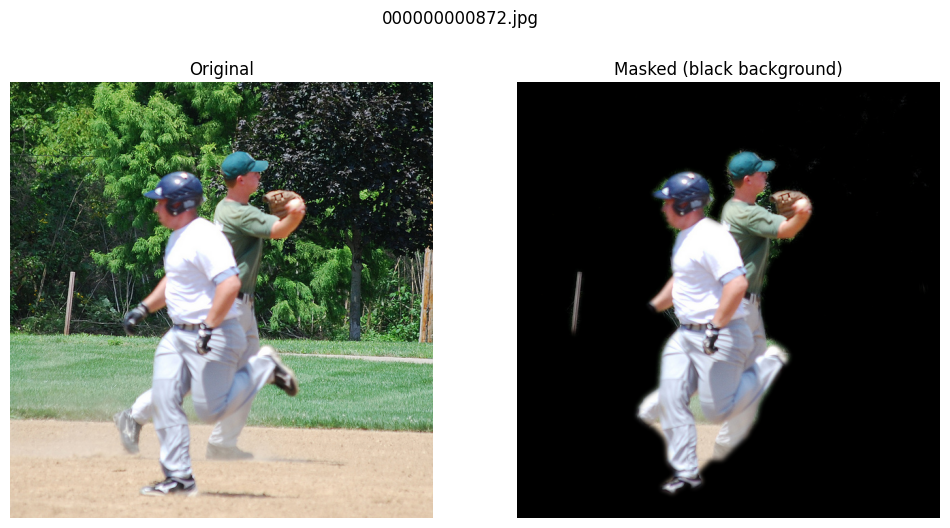

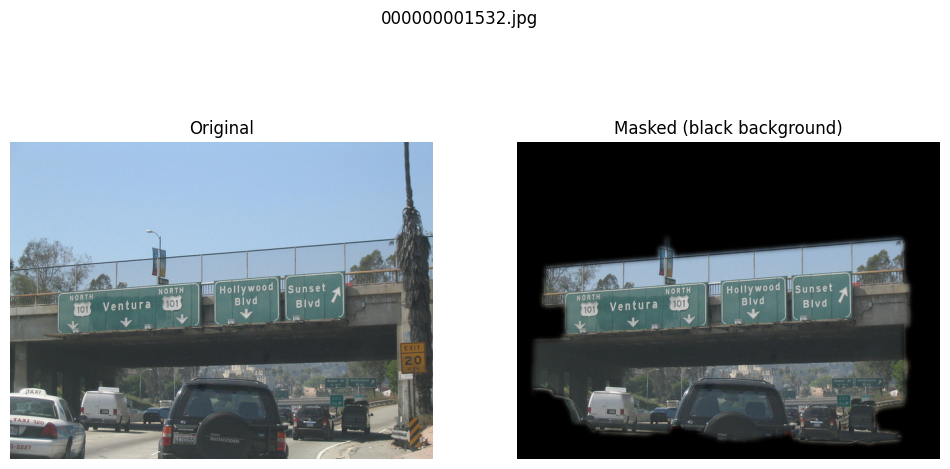

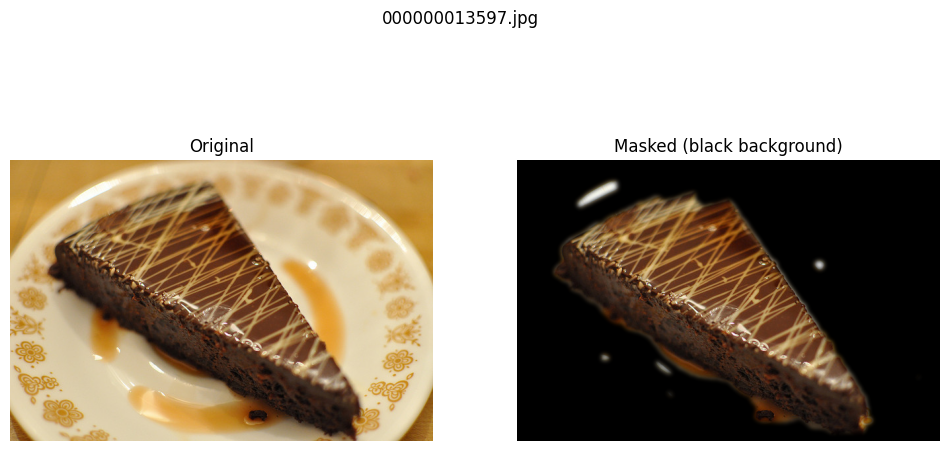

In [5]:
for p in Selected_imgs:
    img_bgr = cv2.imread(str(p), cv2.IMREAD_COLOR)
    h, w = img_bgr.shape[:2]
    mask = np.zeros((h, w), np.uint8)
    rect = (int(w*0.03), int(h*0.03), int(w*0.94), int(h*0.94))

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    cv2.grabCut(img_bgr, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    mask_fg = np.where((mask == cv2.GC_FGD) | (mask == cv2.GC_PR_FGD), 255, 0).astype('uint8')
    alpha = cv2.GaussianBlur(mask_fg, (21, 21), 0)

    orig_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    alpha_f = (alpha.astype(np.float32) / 255.0)[:, :, None]
    black = np.zeros_like(orig_rgb)
    onblack = (orig_rgb.astype(np.float32) * alpha_f + black.astype(np.float32) * (1 - alpha_f)).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(orig_rgb); axes[0].set_title("Original"); axes[0].axis("off")
    axes[1].imshow(onblack); axes[1].set_title("Masked (black background)"); axes[1].axis("off")
    plt.suptitle(p.name)
    plt.show()
